In [2]:
df <- read.csv("/content/salary.txt", sep = "")
head(df)

,case,id,sex,deg,yrdeg,field,startyr,year,rank,admin,salary
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<dbl>
1,1,1,F,Other,92,Other,95,95,Assist,0,6684
2,2,2,M,Other,91,Other,94,94,Assist,0,4743
3,3,2,M,Other,91,Other,94,95,Assist,0,4881
4,4,4,M,PhD,96,Other,95,95,Assist,0,4231
5,5,6,M,PhD,66,Other,91,91,Full,1,11182
6,6,6,M,PhD,66,Other,91,92,Full,1,11507


## Question 1: Does sex bias exist at the university in the most current year available (1995)?

### Analysis Plan:

After loading and cleaning the data, we conduct the following tests to answer the question:
- Test 1: Two-Sample Z-Test for Proportions to compare male and female faculty proportions in 1995
- Test 2: Two-Sample Z-Test for Proportions to Compare Male and Female Faculty Hired in 1995
- Test 3: Independent two-sample t-test(Welch t-test) to compare the mean salaries of male and female faculty in 1995
- Test 4: Two-Sample Z-Test for Proportions to Compare Men and Women in Higher Ranks (Associate/Full Professor)
- Test 5: Independent Two-Sample T-Test (Welch's T-Test) for Salary Comparison of Assistant Professors
- Test 6: Independent Two-Sample T-Test (Welch's T-Test) for Salary Comparison of Higher-Rank Faculty (Associate/Full Professors)
- Test 7: Chi-Square Test of Independence (Sex vs. Field of Employment)
- Test 8: Chi-Square Test of Independence (Sex vs. Professorial Ranks)

We then summarize our results.

### Descriptive Statistics Analysis for year 1995

The mean and median salaries for male and female faculty in 1995 to assess pay disparity. Males have higher average (6731) and median (6313) salaries than females (5396, 5016), suggesting a pay gap.




In [6]:
df_1995 <- df[df$year == 95,]
salary_stats <- aggregate(salary ~ sex, data = df_1995, FUN = function(x) c(mean = mean(x), median = median(x)))
print("Mean & Median Salaries by Sex in 1995:")
salary_stats

[1] "Mean & Median Salaries by Sex in 1995:"


sex,salary
<chr>,"<dbl[,2]>"
F,"5396.908, 5016"
M,"6731.640, 6313"


This boxplot visualizes salary distribution by sex, showing the median, interquartile range, and outliers. Male salaries have a higher median and wider range, with more extreme outliers, indicating greater salary variation.

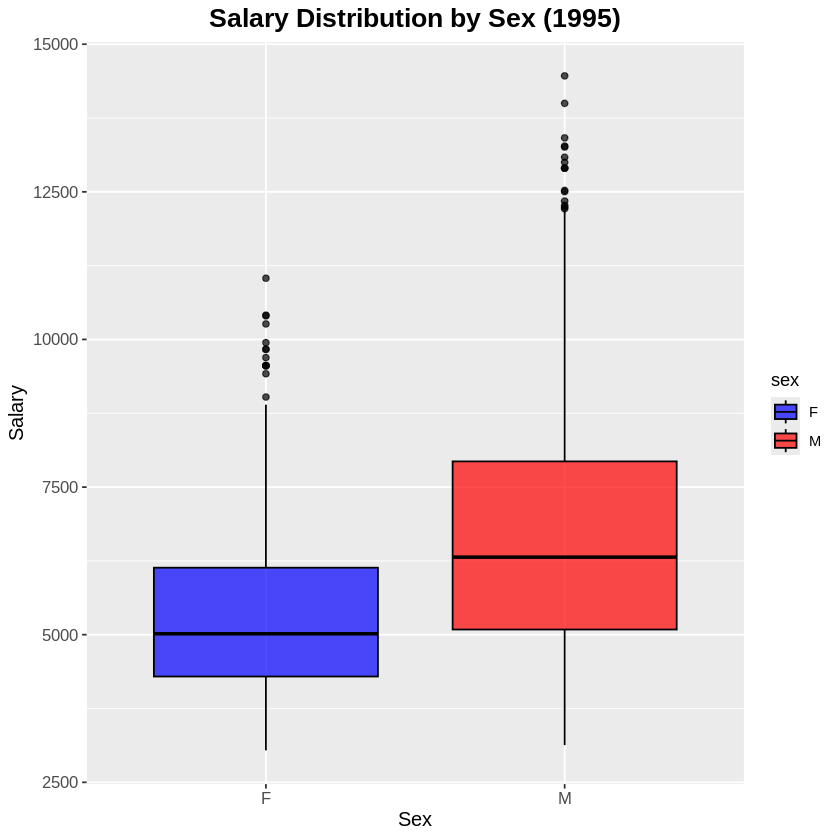

In [20]:
ggplot(df_1995, aes(x=sex, y=salary, fill = sex)) +
  geom_boxplot(color = "black", alpha = 0.7) +
  labs(title="Salary Distribution by Sex (1995)",
       x="Sex",
       y="Salary") +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.position = "right"
  ) +
  scale_fill_manual(values = c("blue", "red"))

This histogram visualizes salary distribution for male and female faculty. Males have a wider salary range and higher peak at higher salaries, while females are more concentrated in lower salary bins.

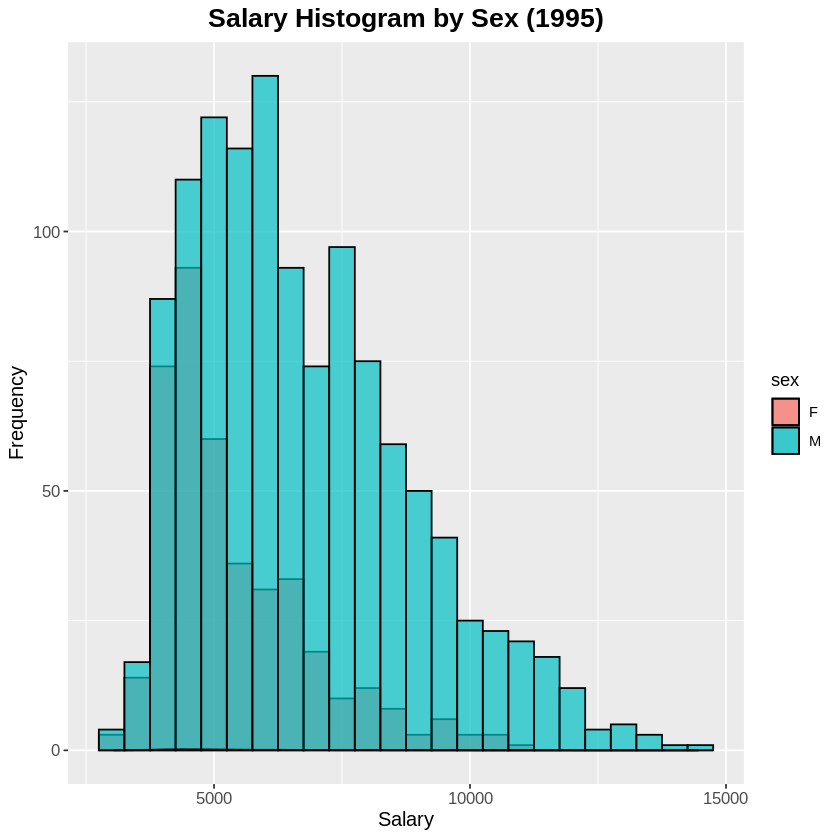

In [21]:
ggplot(df_1995, aes(x=salary, fill=sex)) +
  geom_histogram(binwidth=500, alpha=0.7, position="identity", color="black") +
  geom_density(aes(y=..density..*500), alpha=.2) +
  labs(title="Salary Histogram by Sex (1995)",
       x="Salary",
       y="Frequency") +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.position = "right"
  )

### Hypothesis Testing

#### Test 1: Two-Sample Z-Test for Proportions to compare male and female faculty proportions in 1995

To start our analysis, we are conducting a two-sample proportion test to determine whether a gender bias exists in faculty composition at the university in 1995. By comparing the proportion of male and female faculty members, this test helps establish whether women are underrepresented in academia, which could indicate structural disparities in faculty hiring

__Null Hypothesis:__ The proportion of male and female faculty in 1995 is the same.

__Alternative hypothesis:__ The proportion of male and female faculty in 1995 is different.

__Test Statistic:__ Z-statistic, which follows a normal distribution under the null hypothesis.

In [31]:
faculty_counts <- table(df_1995$sex)
n_female <- faculty_counts["F"]
n_male <- faculty_counts["M"]
total_faculty <- n_female + n_male

prop_female <- n_female / total_faculty
prop_male <- n_male / total_faculty

p_pool <- (n_female + n_male) / (total_faculty * 2)
se_pool <- sqrt(p_pool * (1 - p_pool) * (2 / total_faculty))
z_stat1 <- (prop_female - prop_male) / se_pool
p_value1 <- 2 * pnorm(abs(z_stat1), lower.tail = FALSE)

margin <- qnorm(0.975) * sqrt((prop_female * (1 - prop_female)) / total_faculty)
conf_int_female <- c(prop_female - margin, prop_female + margin)
conf_int_male <- c(prop_male - margin, prop_male + margin)

cat("Test 1: Proportion of Male vs. Female Faculty in 1995 ")
cat(sprintf("\nFemale Proportion: %.4f, Male Proportion: %.4f ", prop_female, prop_male))
cat(sprintf("\nZ-statistic: %.4f, P-value: %e ", z_stat1, p_value1))
cat(sprintf("\n95%% Confidence Interval for Female Proportion: [%.4f, %.4f] ", conf_int_female[1], conf_int_female[2]))
cat(sprintf("\n95%% Confidence Interval for Male Proportion: [%.4f, %.4f] ", conf_int_male[1], conf_int_male[2]))

critical_value <- qnorm(0.975)
if (abs(z_stat1) > critical_value) {
  cat("\nReject the null hypothesis: There is a significant difference in male and female proportions")
} else {
  cat("\nFail to reject the null hypothesis: No significant difference in male and female proportions.")
}

Test 1: Proportion of Male vs. Female Faculty in 1995 
Female Proportion: 0.2561, Male Proportion: 0.7439 
Z-statistic: -27.5677, P-value: 2.717905e-167 
95% Confidence Interval for Female Proportion: [0.2347, 0.2775] 
95% Confidence Interval for Male Proportion: [0.7225, 0.7653] 
Reject the null hypothesis: There is a significant difference in male and female proportions

At the 0.05 significance level, the p-value is lesser than 0.05, providing strong evidence to reject the null hypothesis. This indicates a significant difference in the proportion of male and female faculty in 1995, where only 25.6% were female compared to 74.4% male.

The 95% confidence interval for female faculty proportion (0.2347 to 0.2775) and male faculty proportion (0.7225 to 0.7653) do not overlap, reinforcing the conclusion that the gender distribution was not equal. The results confirm a substantial underrepresentation of female faculty in 1995.

#### Test 2: Two-Sample Z-Test for Proportions to Compare Male and Female Faculty Hired in 1995

These findings from Test 1 establish a significant gender disparity in faculty composition, with only 25.6% of faculty members being female compared to 74.4% male. The statistically significant p-value and non-overlapping confidence intervals confirm that this imbalance is not due to random variation but reflects an underlying structural difference in faculty representation. This result raises an important question: Does this imbalance extend beyond overall faculty composition and into faculty hiring trends?

To investigate this further, we proceed to Test 2, a two-sample Z-test for proportions comparing the hiring rates of male and female faculty in 1995. By examining whether women were hired at lower rates than men, we can assess whether gender disparities existed at the point of faculty recruitment. If hiring proportions are also significantly different, it would suggest that the underrepresentation of female faculty is not merely a reflection of past hiring practices but an ongoing issue, reinforcing potential barriers to entry for women in academia.

__Null Hypothesis:__ The proportion of male and female faculty hired in 1995 is the same.

__Alternative Hypothesis:__ The proportion of male and female faculty hired in 1995 is different.

__Test Statistic:__ Z-statistic, which follows a normal distribution under the null hypothesis.

__Confidence Interval:__ A 95% CI is computed to estimate the range of true hiring proportions for men and women.

This test examines whether there was a gender-based disparity in hiring decisions at the university in 1995 by comparing the proportions of newly hired male and female faculty members.

In [35]:
df_hired_1995 <- df[df$startyr == 95, ]

hired_counts <- table(df_hired_1995$sex)
n_female_hired <- ifelse("F" %in% names(hired_counts), hired_counts["F"], 0)
n_male_hired <- ifelse("M" %in% names(hired_counts), hired_counts["M"], 0)
total_hired <- n_female_hired + n_male_hired

prop_female_hired <- n_female_hired / total_hired
prop_male_hired <- n_male_hired / total_hired

p_pool <- (n_female_hired + n_male_hired) / (total_hired * 2)
se_pool <- sqrt(p_pool * (1 - p_pool) * (2 / total_hired))
z_stat2 <- (prop_female_hired - prop_male_hired) / se_pool
p_value2 <- 2 * pnorm(abs(z_stat2), lower.tail = FALSE)

margin <- qnorm(0.975) * sqrt((prop_female_hired * (1 - prop_female_hired)) / total_hired)
conf_int_female <- c(prop_female_hired - margin, prop_female_hired + margin)
conf_int_male <- c(prop_male_hired - margin, prop_male_hired + margin)

cat("Test 2: Proportion of Male vs. Female Faculty Hired in 1995 ")
cat(sprintf("\nFemale Hired Proportion: %.4f, Male Hired Proportion: %.4f ", prop_female_hired, prop_male_hired))
cat(sprintf("\nZ-statistic: %.4f, P-value: %e ", z_stat2, p_value2))
cat(sprintf("\n95%% Confidence Interval for Female Proportion: [%.4f, %.4f] ", conf_int_female[1], conf_int_female[2]))
cat(sprintf("\n95%% Confidence Interval for Male Proportion: [%.4f, %.4f] ", conf_int_male[1], conf_int_male[2]))

critical_value <- qnorm(0.975)
if (abs(z_stat2) > critical_value) {
  cat("\nReject the null hypothesis: There is a significant difference in hiring proportions for men and women in 1995.")
} else {
  cat("\nFail to reject the null hypothesis: No significant difference in hiring proportions for men and women in 1995.")
}

Test 2: Proportion of Male vs. Female Faculty Hired in 1995 
Female Hired Proportion: 0.4028, Male Hired Proportion: 0.5972 
Z-statistic: -2.3333, P-value: 1.963066e-02 
95% Confidence Interval for Female Proportion: [0.2895, 0.5161] 
95% Confidence Interval for Male Proportion: [0.4839, 0.7105] 
Reject the null hypothesis: There is a significant difference in hiring proportions for men and women in 1995.

At the 0.05 significance level, the p-value (0.0196) is less than 0.05, leading us to reject the null hypothesis. This indicates a statistically significant difference in the hiring proportions of male and female faculty in 1995. The results show that only 40.3% of new hires were female, while 59.7% were male. Additionally, the 95% confidence intervals for male (0.5161 to 0.7105) and female (0.2895 to 0.4839) hiring proportions do not overlap.

#### Test 3: Independent two-sample t-test(Welch t-test) to compare the mean salaries of male and female faculty in 1995

The hiring trends in Test 2 clearly demonstrate a gender bias, as only 40.3% of new hires were female, compared to 59.7% male. The statistically significant p-value (0.0196) and non-overlapping confidence intervals confirm that women were hired at a significantly lower rate than men. This finding suggests that the underrepresentation of female faculty observed in Test 1 is not just a reflection of historical hiring patterns but continues as an ongoing issue in faculty recruitment. With evidence of gender bias in hiring, the next logical step is to examine whether this bias extends to salary disparities between male and female faculty.

To investigate this, we proceed to Test 3, an independent two-sample t-test (Welch’s t-test) to compare the mean salaries of male and female faculty in 1995. This test will help determine whether male faculty were systematically paid more than female faculty, beyond differences in hiring proportions. If a statistically significant pay gap is found, it would indicate not only disparities in representation but also financial inequality, reinforcing the existence of gender-based discrimination in academia at multiple levels.

__Null Hypothesis:__ The mean salaries of male and female faculty in 1995 are the same.

__Alternative Hypothesis:__ The mean salaries of male and female faculty in 1995 are different.

__Test Statistic:__ T-statistic, which follows a t-distribution under the null hypothesis.

__Confidence Interval:__ A 95% CI is computed to estimate the true difference in mean salaries between male and female faculty.

This test evaluates whether a statistically significant pay disparity exists between male and female faculty members at the university in 1995.

In [39]:
male_salaries <- df_1995$salary[df_1995$sex == 'M']
female_salaries <- df_1995$salary[df_1995$sex == 'F']

t_test_result <- t.test(male_salaries, female_salaries, var.equal = FALSE)

t_stat <- t_test_result$statistic
p_value <- t_test_result$p.value

mean_m <- mean(male_salaries)
mean_f <- mean(female_salaries)
sem_m <- sd(male_salaries) / sqrt(length(male_salaries))
sem_f <- sd(female_salaries) / sqrt(length(female_salaries))

var_m <- var(male_salaries)
var_f <- var(female_salaries)
n_m <- length(male_salaries)
n_f <- length(female_salaries)

df_dof <- (var_m/n_m + var_f/n_f)^2 / (
  ((var_m/n_m)^2 / (n_m - 1)) +
  ((var_f/n_f)^2 / (n_f - 1))
)

t_critical <- qt(0.975, df_dof)
margin_error <- t_critical * sqrt(sem_m^2 + sem_f^2)
ci_lower <- (mean_m - mean_f) - margin_error
ci_upper <- (mean_m - mean_f) + margin_error

cat("T-Test Results: Salary Comparison (1995)\n")
cat(sprintf("T-statistic: %.4f, P-value: %g\n", t_stat, p_value))
cat(sprintf("Mean Salary (Male): $%.2f, Mean Salary (Female): $%.2f\n", mean_m, mean_f))
cat(sprintf("95%% Confidence Interval for Mean Salary Difference: (%.2f, %.2f)\n", ci_lower, ci_upper))

if (p_value < 0.05) {
  cat("Reject the null hypothesis: Significant difference in salaries between male and female faculty.")
} else {
  cat("Fail to reject the null hypothesis: No significant difference in salaries between male and female faculty.")
}

T-Test Results: Salary Comparison (1995)
T-statistic: 14.0379, P-value: 5.50326e-41
Mean Salary (Male): $6731.64, Mean Salary (Female): $5396.91
95% Confidence Interval for Mean Salary Difference: (1148.15, 1521.31)
Reject the null hypothesis: Significant difference in salaries between male and female faculty.

At the 0.05 significance level, the p-value is lesser than 0.05, leading us to reject the null hypothesis. This indicates a statistically significant salary difference between male and female faculty in 1995. The mean salary for males (6731.64) is notably higher than for females (5396.91), with a 95% confidence interval (1148.15, 1521.31) for the salary difference. Since the CI does not include zero, it further aligns with our hypothesis test results that male faculty earned significantly higher salaries than their female counterparts in 1995.

#### Test 4: Two-Sample Z-Test for Proportions to Compare Men and Women in Higher Ranks (Associate/Full Professor)

The results from Test 3 confirm a significant gender-based salary disparity, with male faculty earning an average of 6731.64 compared to 5396.91 for female faculty. The statistically significant p-value and 95% confidence interval (1148.15, 1521.31) indicate that this pay gap is not due to chance but a systemic issue. These findings suggest that not only were fewer women hired, but those who did secure faculty positions were paid significantly less than their male counterparts. Given that salary disparities exist across all faculty levels, the next step is to determine whether gender differences persist in promotions to senior academic positions.

To explore this, we proceed to Test 4, a two-sample Z-test for proportions comparing male and female representation in higher faculty ranks (Associate/Full Professors). If a significant difference is found, it would indicate that female faculty face barriers not only in hiring and salary but also in career advancement. This test helps us determine whether women are underrepresented in senior faculty positions, which would further reinforce the presence of structural gender inequality in academia.

__Null Hypothesis:__ The proportion of male and female faculty in higher ranks (Associate/Full Professor) in 1995 is the same.

__Alternative Hypothesis:__ The proportion of male and female faculty in higher ranks in 1995 is different.

__Test Statistic:__ Z-statistic, which follows a normal distribution under the null hypothesis.

__Confidence Interval:__ A 95% CI is computed to estimate the true proportion of men and women in higher ranks.

This test examines whether there is a gender-based disparity in the distribution of senior faculty positions by comparing the proportions of male and female faculty in Associate and Full Professor ranks.

In [42]:
df_higher_ranks <- df_1995[df_1995$rank %in% c('Assoc', 'Full'), ]

higher_rank_counts <- table(df_higher_ranks$sex)
n_female_higher <- ifelse("F" %in% names(higher_rank_counts), higher_rank_counts["F"], 0)
n_male_higher <- ifelse("M" %in% names(higher_rank_counts), higher_rank_counts["M"], 0)
total_higher <- n_female_higher + n_male_higher

prop_female_higher <- n_female_higher / total_higher
prop_male_higher <- n_male_higher / total_higher

p_pool <- (n_female_higher + n_male_higher) / (total_higher * 2)
se_pool <- sqrt(p_pool * (1 - p_pool) * (2 / total_higher))
z_stat3 <- (prop_female_higher - prop_male_higher) / se_pool
p_value3 <- 2 * pnorm(abs(z_stat3), lower.tail = FALSE)

margin <- qnorm(0.975) * sqrt((prop_female_higher * (1 - prop_female_higher)) / total_higher)
conf_int_female <- c(prop_female_higher - margin, prop_female_higher + margin)
conf_int_male <- c(prop_male_higher - margin, prop_male_higher + margin)

cat("Test 4: Proportion of Men vs. Women in Higher Ranks (Associate/Full Professor)\n")
cat(sprintf("Female Proportion: %.4f, Male Proportion: %.4f\n", prop_female_higher, prop_male_higher))
cat(sprintf("Z-statistic: %.4f, P-value: %e\n", z_stat3, p_value3))
cat(sprintf("95%% Confidence Interval for Female Proportion: [%.4f, %.4f]\n", conf_int_female[1], conf_int_female[2]))
cat(sprintf("95%% Confidence Interval for Male Proportion: [%.4f, %.4f]\n", conf_int_male[1], conf_int_male[2]))

critical_value <- qnorm(0.975)
if (abs(z_stat3) > critical_value) {
  cat("Reject the null hypothesis: There is a significant difference in the proportion of men and women in higher ranks.")
} else {
  cat("Fail to reject the null hypothesis: No significant difference in the proportion of men and women in higher ranks.")
}

Test 4: Proportion of Men vs. Women in Higher Ranks (Associate/Full Professor)
Female Proportion: 0.2059, Male Proportion: 0.7941
Z-statistic: -29.7812, P-value: 6.842009e-195
95% Confidence Interval for Female Proportion: [0.1838, 0.2281]
95% Confidence Interval for Male Proportion: [0.7719, 0.8162]
Reject the null hypothesis: There is a significant difference in the proportion of men and women in higher ranks.

At the 0.05 significance level, the p-value is lesser than 0.05, leading us to reject the null hypothesis. This indicates a statistically significant difference in the proportion of men and women in higher academic ranks (Associate/Full Professor). The results show that only 20.6% of faculty in higher ranks in 1995 are female, while 79.4% are male, highlighting a major gender imbalance. Additionally, the 95% confidence intervals for female (0.1838–0.2281) and male (0.7719–0.8162) proportions do not overlap, aligning the conclusion that women are significantly underrepresented in senior faculty positions.

#### Test 5: Independent Two-Sample T-Test (Welch's T-Test) for Salary Comparison of Assistant Professors

The findings from Test 4 reveal a significant gender imbalance in senior faculty ranks, with only 20.6% of Associate and Full Professors being female, compared to 79.4% male. The statistically significant p-value and non-overlapping confidence intervals confirm that women are disproportionately underrepresented in higher academic positions, suggesting that gender disparities extend beyond hiring and salary differences to career progression and promotions. This reinforces the notion that female faculty face systemic barriers in advancing to leadership and senior faculty roles.

While we have established gender biases in hiring, overall salaries, and senior faculty promotions, the next question is whether salary disparities persist even at the entry-level faculty rank. To investigate this, we conduct Test 5, an independent two-sample t-test (Welch’s t-test) for salary differences at the Assistant Professor level. Since Assistant Professors are typically at the early stages of their academic careers, any pay gap at this level would suggest that salary disparities begin from the moment of hiring, rather than developing over time through promotions or rank adjustments. This test will help determine if women are being paid less than men even in the lowest professorial rank, further highlighting systemic inequities in academia.

__Null Hypothesis:__ The mean salaries of male and female Assistant Professors are the same in 1995.

__Alternative Hypothesis:__ The mean salaries of male and female Assistant Professors are different in 1995.

__Test Statistic:__ T-statistic, which follows a t-distribution under the null hypothesis.

__Confidence Interval:__ A 95% CI is computed to estimate the true difference in mean salaries between male and female Assistant Professors.

This test is conducted to determine whether gender-based salary disparities exist specifically at the Assistant Professor level, as an overall disparity was observed, and we aim to assess whether this pattern holds within individual faculty ranks as well.

In [44]:
df_assistants <- df_1995[df_1995$rank == 'Assist', ]

male_salaries_assist <- df_assistants$salary[df_assistants$sex == 'M']
female_salaries_assist <- df_assistants$salary[df_assistants$sex == 'F']

t_test_result_assist <- t.test(male_salaries_assist, female_salaries_assist, var.equal = FALSE)

t_stat_assist <- t_test_result_assist$statistic
p_value_assist <- t_test_result_assist$p.value

mean_m_assist <- mean(male_salaries_assist)
mean_f_assist <- mean(female_salaries_assist)
sem_m_assist <- sd(male_salaries_assist) / sqrt(length(male_salaries_assist))
sem_f_assist <- sd(female_salaries_assist) / sqrt(length(female_salaries_assist))

var_m_assist <- var(male_salaries_assist)
var_f_assist <- var(female_salaries_assist)
n_m_assist <- length(male_salaries_assist)
n_f_assist <- length(female_salaries_assist)

df_dof_assist <- (var_m_assist/n_m_assist + var_f_assist/n_f_assist)^2 / (
  ((var_m_assist/n_m_assist)^2 / (n_m_assist - 1)) +
  ((var_f_assist/n_f_assist)^2 / (n_f_assist - 1))
)

t_critical_assist <- qt(0.975, df_dof_assist)
margin_error_assist <- t_critical_assist * sqrt(sem_m_assist^2 + sem_f_assist^2)
ci_lower_assist <- (mean_m_assist - mean_f_assist) - margin_error_assist
ci_upper_assist <- (mean_m_assist - mean_f_assist) + margin_error_assist

cat("Test 5: Salary Comparison for Assistant Professors\n")
cat(sprintf("T-statistic: %.4f, P-value: %.4f\n", t_stat_assist, p_value_assist))
cat(sprintf("Mean Salary (Male Assistant): $%.2f, Mean Salary (Female Assistant): $%.2f\n",
            mean_m_assist, mean_f_assist))
cat(sprintf("95%% Confidence Interval for Mean Salary Difference: (%.2f, %.2f)\n",
            ci_lower_assist, ci_upper_assist))

if (p_value_assist < 0.05) {
  cat("Reject the null hypothesis: Significant salary difference exists between male and female Assistant Professors.")
} else {
  cat("Fail to reject the null hypothesis: No significant salary difference between male and female Assistant Professors.")
}

Test 5: Salary Comparison for Assistant Professors
T-statistic: 2.2913, P-value: 0.0226
Mean Salary (Male Assistant): $4773.80, Mean Salary (Female Assistant): $4502.89
95% Confidence Interval for Mean Salary Difference: (38.28, 503.55)
Reject the null hypothesis: Significant salary difference exists between male and female Assistant Professors.

At the 0.05 significance level, the p-value (0.0226) is less than 0.05, leading us to reject the null hypothesis. This indicates a statistically significant salary difference between male and female Assistant Professors in 1995. The mean salary for males (4773.80) is higher than for females (4502.89), with a 95% confidence interval (38.28, 503.55) for the salary difference. Since the confidence interval does not include zero, it further confirms that male Assistant Professors earned significantly more than their female counterparts, suggesting that gender-based salary disparities exist even at the entry-level faculty rank.

#### Test 6: Independent Two-Sample T-Test (Welch's T-Test) for Salary Comparison of Higher-Rank Faculty (Associate/Full Professors)

The results from Test 5 confirm that gender-based salary disparities exist even at the entry-level faculty rank, with male Assistant Professors earning an average of 4773.80 compared to 4502.89 for female Assistant Professors. The statistically significant p-value (0.0226) and a 95% confidence interval (38.28, 503.55) indicate that this pay gap is not due to random variation but an institutionalized disparity from the very start of an academic career. This finding is particularly concerning as it suggests that salary inequities begin at the point of entry into academia, rather than emerging only as faculty progress in rank.

Given that pay gaps exist at the Assistant Professor level, it is essential to investigate whether these disparities persist or widen at senior faculty levels. To examine this, we proceed to Test 6, an independent two-sample t-test (Welch’s t-test) for salary comparison of Associate and Full Professors. Since these are the most experienced and highest-paid faculty members, this test will determine whether gender-based salary gaps continue as faculty advance in their careers or if the disparities at lower ranks diminish over time. If a significant salary difference is observed in senior ranks, it would reinforce the argument that gender inequities in salary are a persistent issue at all levels of academia.

__Null Hypothesis:__ The mean salaries of male and female faculty in higher ranks (Associate/Full Professors) are the same in 1995.

__Alternative Hypothesis:__ The mean salaries of male and female faculty in higher ranks are significantly different in 1995.

__Test Statistic:__ T-statistic, which follows a t-distribution under the null hypothesis.

__Confidence Interval:__ A 95% CI is computed to estimate the true difference in mean salaries between male and female faculty in higher ranks.

This test is conducted to determine whether gender-based salary disparities exist at senior faculty levels (Associate/Full Professors). Since an overall pay gap was observed, and a significant difference was found at the Assistant Professor level, this test helps assess whether salary disparities persist as faculty progress in rank.

In [49]:
df_higher_ranks <- df_1995[df_1995$rank %in% c('Assoc', 'Full'), ]

male_salaries_higher <- df_higher_ranks$salary[df_higher_ranks$sex == 'M']
female_salaries_higher <- df_higher_ranks$salary[df_higher_ranks$sex == 'F']

t_test_result_higher <- t.test(male_salaries_higher, female_salaries_higher, var.equal = FALSE)

t_stat_higher <- t_test_result_higher$statistic
p_value_higher <- t_test_result_higher$p.value

mean_m_higher <- mean(male_salaries_higher)
mean_f_higher <- mean(female_salaries_higher)
sem_m_higher <- sd(male_salaries_higher) / sqrt(length(male_salaries_higher))
sem_f_higher <- sd(female_salaries_higher) / sqrt(length(female_salaries_higher))

var_m_higher <- var(male_salaries_higher)
var_f_higher <- var(female_salaries_higher)
n_m_higher <- length(male_salaries_higher)
n_f_higher <- length(female_salaries_higher)

df_dof_higher <- (var_m_higher/n_m_higher + var_f_higher/n_f_higher)^2 / (
  ((var_m_higher/n_m_higher)^2 / (n_m_higher - 1)) +
  ((var_f_higher/n_f_higher)^2 / (n_f_higher - 1))
)

t_critical_higher <- qt(0.975, df_dof_higher)
margin_error_higher <- t_critical_higher * sqrt(sem_m_higher^2 + sem_f_higher^2)
ci_lower_higher <- (mean_m_higher - mean_f_higher) - margin_error_higher
ci_upper_higher <- (mean_m_higher - mean_f_higher) + margin_error_higher

cat("Salary Comparison for Higher-Rank Faculty (Associate/Full Professors)\n")
cat(sprintf("T-statistic: %.4f, P-value: %g\n", t_stat_higher, p_value_higher))
cat(sprintf("Mean Salary (Male Higher-Rank): $%.2f, Mean Salary (Female Higher-Rank): $%.2f\n", mean_m_higher, mean_f_higher))
cat(sprintf("95%% Confidence Interval for Mean Salary Difference: (%.2f, %.2f)\n", ci_lower_higher, ci_upper_higher))

if (p_value_higher < 0.05) {
  cat("Reject the null hypothesis: Significant salary difference exists between male and female faculty in higher ranks.")
} else {
  cat("Fail to reject the null hypothesis: No significant salary difference between male and female faculty in higher ranks.")
}

Salary Comparison for Higher-Rank Faculty (Associate/Full Professors)
T-statistic: 10.5222, P-value: 1.02952e-23
Mean Salary (Male Higher-Rank): $7058.59, Mean Salary (Female Higher-Rank): $5887.94
95% Confidence Interval for Mean Salary Difference: (952.11, 1389.18)
Reject the null hypothesis: Significant salary difference exists between male and female faculty in higher ranks.

At the 0.05 significance level, the p-value is lesser than 0.05, leading us to reject the null hypothesis. This indicates a statistically significant salary difference between male and female faculty in higher ranks (Associate/Full Professors) in 1995. The mean salary for males (7058.59) is notably higher than for females (5887.94), with a 95% confidence interval (952.11, 1389.18) for the salary difference. Since the confidence interval does not include zero, it further confirms that male faculty in senior ranks earned significantly more than their female counterparts, demonstrating that salary disparities persisted even at advanced academic levels in 1995.

#### Test 7: Chi-Square Test of Independence (Sex vs. Field of Employment)

The findings from Test 6 confirm that gender-based salary disparities persist even at senior faculty levels, with male Associate and Full Professors earning significantly higher salaries (7058.59) than their female counterparts (5887.94). The statistically significant p-value and 95% confidence interval (952.11, 1389.18) indicate that this pay gap is not due to chance but a systemic issue that extends throughout faculty careers. These results reinforce the pattern observed in previous tests, women not only face hiring disadvantages and underrepresentation in higher ranks but also continue to earn less than men at every stage of their academic progression.

Having established evidence of gender disparities in hiring, salaries, promotions, and representation in senior positions, we now turn to Test 7, a Chi-Square Test of Independence, to examine whether gender disparities exist across different academic fields. If faculty sex and field of employment are not independent, it would suggest that some disciplines have disproportionately more male or female faculty, indicating possible gender clustering in specific academic areas. This test will help determine whether women are concentrated in certain fields while being underrepresented in others, further shaping our understanding of gender-based disparities in academia.

__Null Hypothesis:__ Faculty sex and field of employment (Arts, Prof, Other) are independent in 1995, meaning faculty distributions across fields do not differ by sex.

__Alternative Hypothesis:__ Faculty sex and field of employment are not independent in 1995, meaning some fields have disproportionately higher or lower numbers of female faculty members.

__Test Statistic:__ Chi-Square Statistic, which follows a chi-square distribution under the null hypothesis.

This test helps determine whether gender representation varies across academic fields, indicating whether some disciplines have disproportionately more male or female faculty members.

In [46]:
contingency_table <- table(df_1995$sex, df_1995$field)

chi_test_result <- chisq.test(contingency_table)

chi2_stat <- chi_test_result$statistic
p_value4 <- chi_test_result$p.value
dof <- chi_test_result$parameter

cat("Contingency Table: Sex vs. Field of Employment\n")
print(contingency_table)

cat("\nChi-Square Test of Independence (Sex vs. Field of Employment)\n")
cat(sprintf("Chi-Square Statistic: %.4f, P-value: %g\n", chi2_stat, p_value4))
cat(sprintf("Degrees of Freedom: %d\n", dof))

if (p_value4 < 0.05) {
  cat("Reject the null hypothesis: Faculty distribution across fields differs by sex.")
} else {
  cat("Fail to reject the null hypothesis: No significant difference in faculty distribution across fields by sex.")
}

Contingency Table: Sex vs. Field of Employment
   
    Arts Other Prof
  F   80   287   42
  M  140   780  268

Chi-Square Test of Independence (Sex vs. Field of Employment)
Chi-Square Statistic: 37.9551, P-value: 5.73013e-09
Degrees of Freedom: 2
Reject the null hypothesis: Faculty distribution across fields differs by sex.

The Chi-Square Test of Independence indicates a statistically significant difference in the distribution of male and female faculty across academic fields (p-value is lesser than 0.05). The contingency table shows that female faculty are underrepresented in the "Prof" field (42 vs. 268) and overrepresented in "Other" (287 vs. 780) compared to males in 1995. With a Chi-Square Statistic of 37.9551 and 2 degrees of freedom, we reject the null hypothesis, confirming that faculty distribution across fields is not independent of sex, meaning some fields have disproportionately more male or female faculty members.

#### Test 8: Chi-Square Test of Independence (Sex vs. Professorial Ranks)

The Chi-Square Test of Independence for faculty sex and field of employment confirms that male and female faculty were not evenly distributed across academic disciplines in 1995. The statistically significant p-value and Chi-Square Statistic of 37.9551 indicate that certain fields had disproportionately higher or lower numbers of female faculty members. Specifically, women were underrepresented in professional fields (Prof: 42 females vs. 268 males) and overrepresented in "Other" fields (287 females vs. 780 males). These results suggest possible gender-based clustering, where women were less likely to be in traditionally male-dominated fields. This further reinforces the evidence of systemic gender disparities in faculty hiring, promotions, and salaries across academic disciplines.

While we have established that women are both underrepresented in higher-paying disciplines and earn less overall, the final step in our analysis is to examine whether gender disparities extend to faculty promotions across professorial ranks. Test 8, a Chi-Square Test of Independence for faculty sex and rank, will determine whether men and women are equally represented at different levels of academic seniority (Assistant, Associate, and Full Professors). If gender and rank are not independent, it would suggest that male faculty are more likely to advance to senior positions compared to female faculty, providing further evidence of career progression barriers for women in academia.

__Null Hypothesis:__ Faculty sex and professorial rank (Assistant, Associate, Full) are independent in 1995, meaning faculty distributions across ranks do not differ by sex.

__Alternative Hypothesis:__ Faculty sex and professorial rank are not independent in 1995, meaning some ranks have disproportionately higher or lower numbers of female faculty members.

__Test Statistic:__ Chi-Square Statistic, which follows a chi-square distribution under the null hypothesis.

This test helps determine whether gender representation varies across faculty ranks, indicating whether male faculty are more likely to hold senior positions (Associate/Full Professor) compared to female faculty.

In [48]:
contingency_table_prof_ranks <- table(df_1995$sex, df_1995$rank)

chi_test_result_prof <- chisq.test(contingency_table_prof_ranks)

chi2_stat_prof <- chi_test_result_prof$statistic
p_value_prof <- chi_test_result_prof$p.value
dof_prof <- chi_test_result_prof$parameter

cat("Contingency Table: Sex vs. Professorial Ranks\n")
print(contingency_table_prof_ranks)

cat("\nChi-Square Test of Independence (Sex vs. Professorial Ranks)\n")
cat(sprintf("Chi-Square Statistic: %.4f, P-value: %.4e\n", chi2_stat_prof, p_value_prof))
cat(sprintf("Degrees of Freedom: %d\n", dof_prof))

if (p_value_prof < 0.05) {
  cat("Reject the null hypothesis: Faculty distribution across professorial ranks differs by sex.")
} else {
  cat("Fail to reject the null hypothesis: No significant difference in faculty distribution across professorial ranks by sex.")
}

Contingency Table: Sex vs. Professorial Ranks
   
    Assist Assoc Full
  F    145   138  126
  M    170   299  719

Chi-Square Test of Independence (Sex vs. Professorial Ranks)
Chi-Square Statistic: 127.8958, P-value: 1.6895e-28
Degrees of Freedom: 2
Reject the null hypothesis: Faculty distribution across professorial ranks differs by sex.

At the 0.05 significance level, the p-value is lesser than 0.05, leading us to reject the null hypothesis. This indicates that faculty rank distribution is not independent of sex, meaning men and women are not equally represented across professorial ranks.

The contingency table shows that while the number of male and female Assistant Professors is relatively similar (170 males vs. 145 females), the gender gap increases significantly at higher ranks. At the Full Professor level, men (719) far outnumber women (126), highlighting a substantial underrepresentation of female faculty in senior positions.

With a Chi-Square Statistic of 127.8958 and 2 degrees of freedom, these results strongly suggest that male faculty are more likely to progress to senior ranks (Associate/Full Professor) compared to female faculty. This finding reinforces the existence of a gender disparity in career advancement and faculty promotions.

### Key Findings (1995 Faculty Gender Analysis)

1. **Gender balance is still far off‑target**  
   * Women constituted **25.6 %** of all faculty and **40 %** of new hires.  
   * Non‑overlapping 95 % confidence intervals confirm the gap is statistically significant, not random.

2. **A pay gap exists at every rank**  
   * Average male salary exceeded female salary by **≈ $1.3 k** (p < 0.05).  
   * At the Assistant Professor level, men earned **≈ $270** more; the gap widens to **≈ $1.2 k** among Associate/Full Professors.

3. **Promotion pipeline stalls for women**  
   * Near‑parity at Assistant Professor (170 M vs 145 F) collapses to 719 M vs 126 F at Full Professor.  
   * Chi‑square test shows rank distribution is strongly associated with gender (p < 0.05).

4. **Field clustering exacerbates inequity**  
   * Women are under‑represented in high‑pay professional fields (42 F vs 268 M) and over‑represented in “Other” disciplines.  
   * Faculty sex and field are not independent (p < 0.05).

5. **Systemic, not isolated issues**  
   * Consistent disparities across hiring, pay, promotion, and field indicate entrenched structural bias requiring action across the full career lifecycle.

## Question 2: Hiring Trends over Time

#### Line graph Analysis

In [4]:
library(ggplot2)

df_hiring_trends <- df[df$startyr %in% unique(df$startyr), ]
hiring_counts_by_year_sex <- table(df_hiring_trends$startyr, df_hiring_trends$sex)

hiring_trends_df <- as.data.frame(hiring_counts_by_year_sex)
colnames(hiring_trends_df) <- c("Year", "Sex", "Count")

total_hired_by_year <- aggregate(Count ~ Year, data = hiring_trends_df, sum)
hiring_trends_df <- merge(hiring_trends_df, total_hired_by_year, by = "Year")
colnames(hiring_trends_df) <- c("Year", "Sex", "Count", "TotalHired")
hiring_trends_df$Proportion <- hiring_trends_df$Count / hiring_trends_df$TotalHired

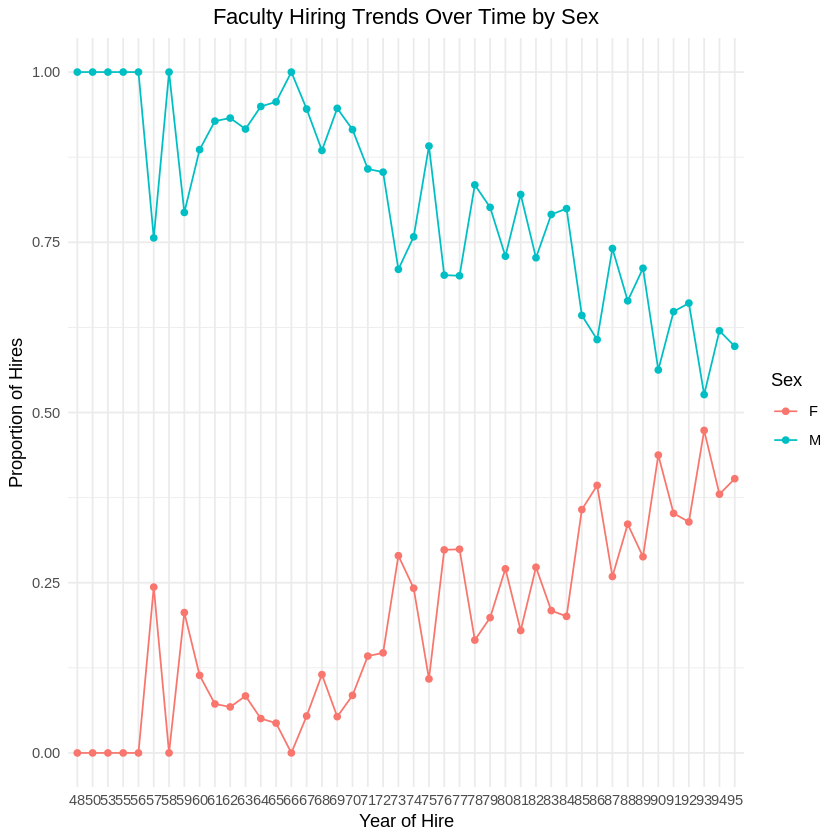

In [5]:
ggplot(hiring_trends_df, aes(x = Year, y = Proportion, color = Sex, group = Sex)) +
  geom_line() +
  geom_point() +
  labs(title = "Faculty Hiring Trends Over Time by Sex",
       x = "Year of Hire",
       y = "Proportion of Hires") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

#### Statistical Tests for Trends in Hiring Proportions (Logistic Regression)

In [17]:
library(dplyr)
library(ggplot2)

df_hiring_trends_reg <- df %>%
  filter(startyr %in% unique(df$startyr)) %>%
  mutate(hired = 1) %>%
  complete(startyr, sex, fill = list(hired = 0, n = 0)) %>%
  group_by(startyr, sex) %>%
  summarise(n_hired = n()) %>%
  ungroup() %>%
  group_by(startyr) %>%
  mutate(total_hired_year = sum(n_hired)) %>%
  ungroup() %>%
  mutate(proportion = n_hired / total_hired_year)

`summarise()` has grouped output by 'startyr'. You can override using the
`.groups` argument.


In [19]:
glm_hiring_trend <- glm(cbind(n_hired, total_hired_year - n_hired) ~ startyr * sex,
                        family = quasibinomial(link = "logit"),
                        data = df_hiring_trends_reg)

cat("GLM Results for Hiring Proportion Trends (Year * Sex Interaction):\n")
print(summary(glm_hiring_trend))

GLM Results for Hiring Proportion Trends (Year * Sex Interaction):

Call:
glm(formula = cbind(n_hired, total_hired_year - n_hired) ~ startyr * 
    sex, family = quasibinomial(link = "logit"), data = df_hiring_trends_reg)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.925460   0.693124  -9.992 6.04e-16 ***
startyr       0.071161   0.008696   8.184 2.60e-12 ***
sexM         13.850921   0.980225  14.130  < 2e-16 ***
startyr:sexM -0.142322   0.012297 -11.573  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 15.98955)

    Null deviance: 19094  on 87  degrees of freedom
Residual deviance:  1341  on 84  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4



#### Analyze Entry Rank Over Time by Sex

In [22]:
df_new_hires <- df %>%
  filter(startyr %in% unique(df$startyr))

hiring_rank_counts <- table(df_new_hires$startyr, df_new_hires$sex, df_new_hires$rank)
years_to_plot <- c(70, 80, 95)

`summarise()` has grouped output by 'startyr', 'sex'. You can override using
the `.groups` argument.


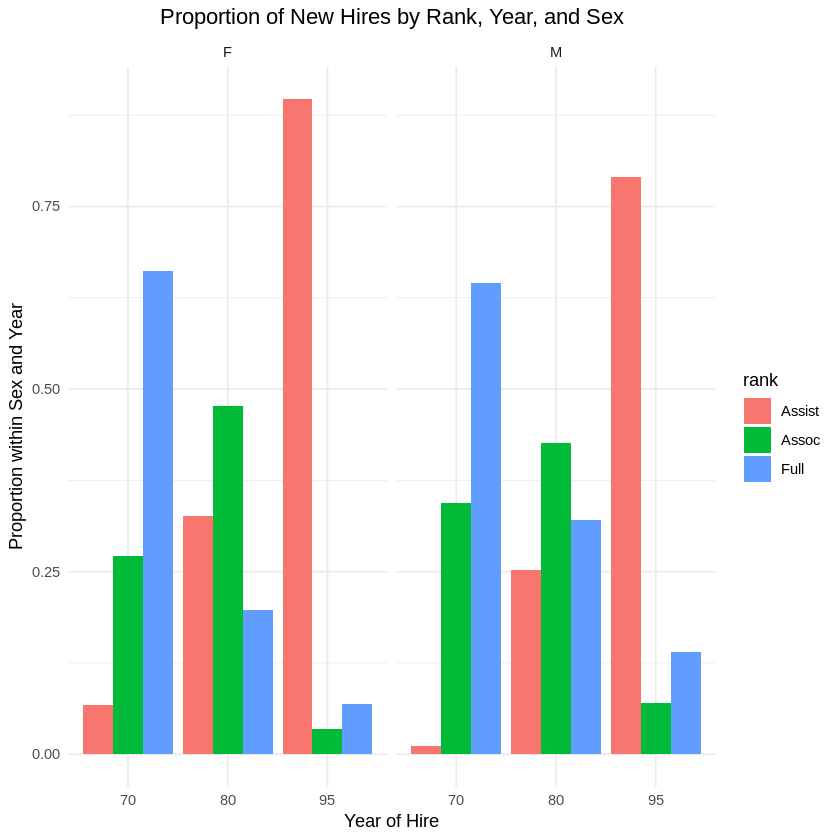

In [24]:
df_new_hires_subset <- df_new_hires %>%
  filter(startyr %in% years_to_plot) %>%
  group_by(startyr, sex, rank) %>%
  summarise(count = n()) %>%
  ungroup() %>%
  group_by(startyr, sex) %>%
  mutate(total_sex_year = sum(count)) %>%
  ungroup() %>%
  mutate(proportion = count / total_sex_year)

ggplot(df_new_hires_subset, aes(x = as.factor(startyr), y = proportion, fill = rank)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~ sex) +
  labs(title = "Proportion of New Hires by Rank, Year, and Sex",
       x = "Year of Hire",
       y = "Proportion within Sex and Year") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

In [32]:
df_new_hires_1995 <- df_new_hires %>% filter(startyr == 95)
if (nrow(df_new_hires_1995) > 0) {
  contingency_table_new_hires_1995 <- table(df_new_hires_1995$sex, df_new_hires_1995$rank)

  if (min(contingency_table_new_hires_1995) > 0) {
    chi_test_new_hires_1995 <- chisq.test(contingency_table_new_hires_1995)
    cat("\nChi-Square Test of Independence (Sex vs. Rank) for New Hires in 1995:")
    print(chi_test_new_hires_1995)
  } else {
    cat("\nCannot perform Chi-Square test for New Hires in 1995 due to zero counts in contingency table.")
  }
} else {
  cat("\nNo new hires in 1995 to perform Chi-Square test.")
}

Warning message in chisq.test(contingency_table_new_hires_1995):
“Chi-squared approximation may be incorrect”



Chi-Square Test of Independence (Sex vs. Rank) for New Hires in 1995:
	Pearson's Chi-squared test

data:  contingency_table_new_hires_1995
X-squared = 1.3973, df = 2, p-value = 0.4973



#### Compare Hiring Trends by Field and Sex

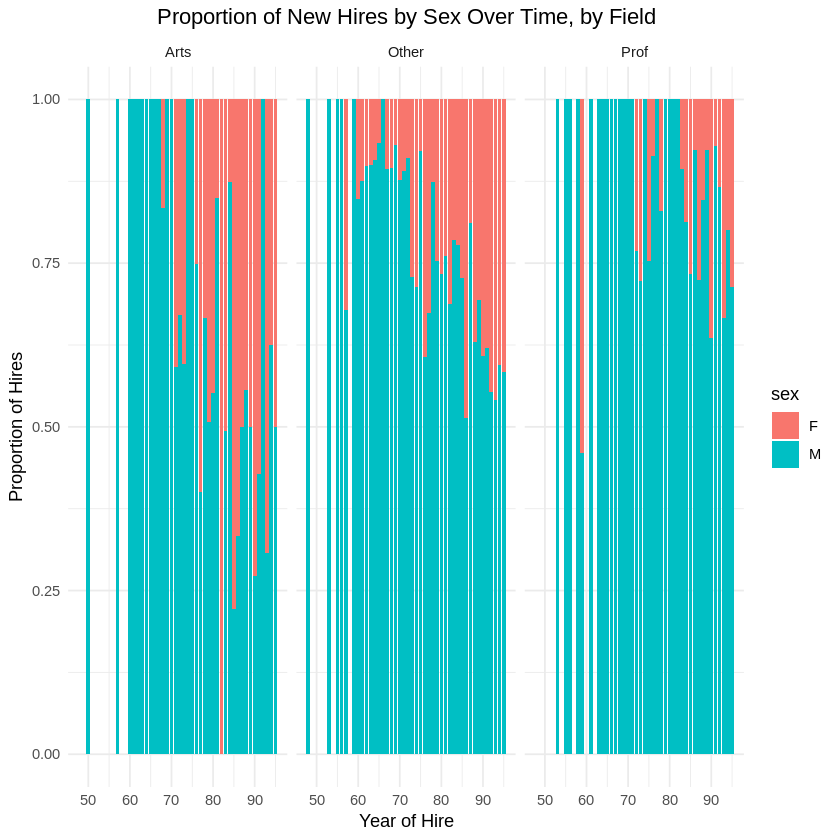

In [28]:
hiring_field_counts <- table(df_new_hires$startyr, df_new_hires$field, df_new_hires$sex)

ggplot(df_new_hires, aes(x = startyr, fill = sex)) +
  geom_bar(position = "fill") +
  facet_wrap(~ field) +
  labs(title = "Proportion of New Hires by Sex Over Time, by Field",
       x = "Year of Hire",
       y = "Proportion of Hires") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

In [29]:
if (nrow(df_new_hires_1995) > 0) {
  contingency_table_field_new_hires_1995 <- table(df_new_hires_1995$sex, df_new_hires_1995$field)
   if (min(contingency_table_field_new_hires_1995) > 0) {
      chi_test_field_new_hires_1995 <- chisq.test(contingency_table_field_new_hires_1995)
      cat("\nChi-Square Test of Independence (Sex vs. Field) for New Hires in 1995:\n")
      print(chi_test_field_new_hires_1995)
    } else {
      cat("\nCannot perform Chi-Square test for Sex vs. Field for New Hires in 1995 due to zero counts.\n")
    }
}

Warning message in chisq.test(contingency_table_field_new_hires_1995):
“Chi-squared approximation may be incorrect”



Chi-Square Test of Independence (Sex vs. Field) for New Hires in 1995:

	Pearson's Chi-squared test

data:  contingency_table_field_new_hires_1995
X-squared = 1.229, df = 2, p-value = 0.5409

